## Sentiment Analysis in Python - Learning Project

In [1]:
# First we will import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Reviews.csv'  # Make sure to use your actual file path
df = pd.read_csv(file_path)


In [4]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
#Let's now read our data.

df = df.head(500)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df['Text'].values[3]

'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.'

In [8]:
print(df.shape)


(500, 10)


### Quick EDA

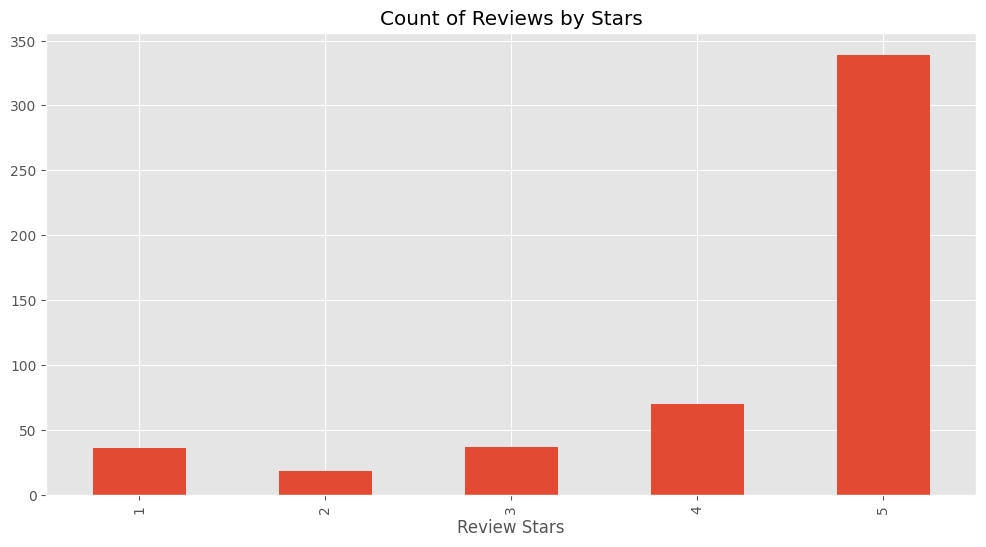

In [9]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars', figsize=(12,6))
ax.set_xlabel('Review Stars')
plt.show()

In [10]:
# Basic NLTK Stuff
example = df['Text'][70]
print(example)

These Albanese gummi bears and rings and so on are very good and tasty and high quality. The bears even have little faces. At my local candy store this type of gummi stuff (bears, rings, snakes, balls, worms, whatever) are about $10/lb. These twin packs of 4.5 or 5 pound bags is a screaming deal as far as I'm concerned. I'm probably 50 pounds deep in these friggin' things. Consumed!


In [11]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['These',
 'Albanese',
 'gummi',
 'bears',
 'and',
 'rings',
 'and',
 'so',
 'on',
 'are']

In [12]:

nltk.download('averaged_perceptron_tagger')

tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('These', 'DT'),
 ('Albanese', 'JJ'),
 ('gummi', 'NN'),
 ('bears', 'NNS'),
 ('and', 'CC'),
 ('rings', 'NNS'),
 ('and', 'CC'),
 ('so', 'RB'),
 ('on', 'IN'),
 ('are', 'VBP')]

In [13]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [14]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  These/DT
  Albanese/JJ
  gummi/NN
  bears/NNS
  and/CC
  rings/NNS
  and/CC
  so/RB
  on/IN
  are/VBP
  very/RB
  good/JJ
  and/CC
  tasty/JJ
  and/CC
  high/JJ
  quality/NN
  ./.
  The/DT
  bears/NNS
  even/RB
  have/VBP
  little/JJ
  faces/VBZ
  ./.
  At/IN
  my/PRP$
  local/JJ
  candy/NN
  store/NN
  this/DT
  type/NN
  of/IN
  gummi/NN
  stuff/NN
  (/(
  bears/NNS
  ,/,
  rings/NNS
  ,/,
  snakes/NNS
  ,/,
  balls/NNS
  ,/,
  worms/NNS
  ,/,
  whatever/WDT
  )/)
  are/VBP
  about/IN
  $/$
  10/lb/CD
  ./.
  These/DT
  twin/JJ
  packs/NNS
  of/IN
  4.5/CD
  or/CC
  5/CD
  pound/NN
  bags/NNS
  is/VBZ
  a/DT
  screaming/VBG
  deal/NN
  as/RB
  far/RB
  as/IN
  I/PRP
  'm/VBP
  concerned/JJ
  ./.
  I/PRP
  'm/VBP
  probably/RB
  50/CD
  pounds/NNS
  deep/JJ
  in/IN
  these/DT
  friggin/NN
  '/''
  things/NNS
  ./.
  Consumed/VBN
  !/.)


## Vader Sentiment Scoring
We will use sentiment analysis analyzer to get the neg/neu/pos scores of the text.
This uses a 'bag of words' approach
1. Stop words are removed
2. Each word is scored and combined to a total score.


In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [16]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [17]:
sia.polarity_scores('This is the worst thing that can happen to anyone!')

{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'compound': -0.6588}

In [18]:
sia.polarity_scores('example')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [19]:
# Run the polarity scores on the entire dataset
res={}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [21]:
#Now we have sentiment score and metadata
vaders.head(10)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,0.029,0.809,0.163,0.8830,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,0.034,0.693,0.273,0.9346,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,0.000,0.520,0.480,0.9487,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


### **Plot Vader Results**

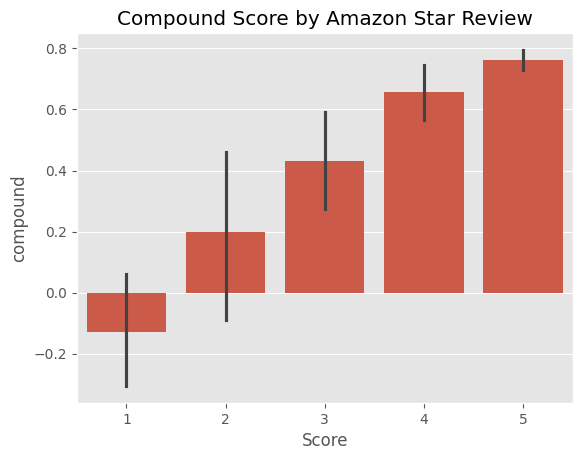

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'vaders' is a DataFrame that has been previously defined and contains columns 'Score' and 'compound'
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()


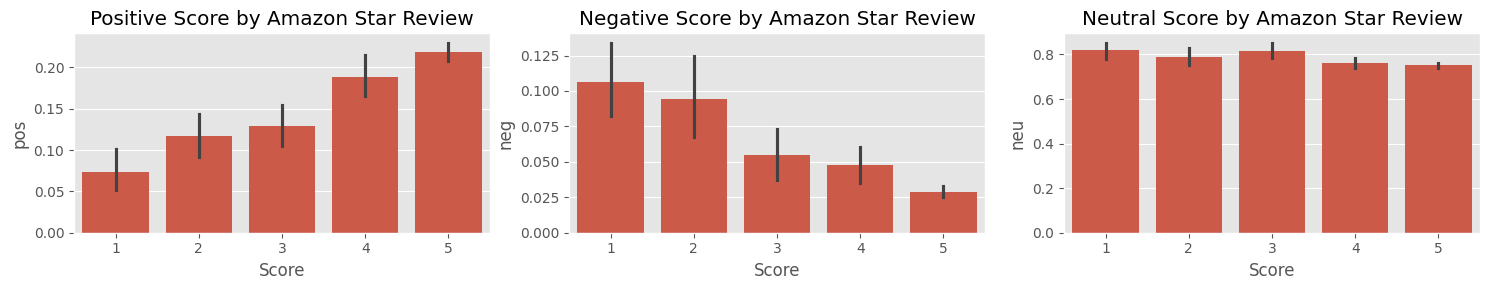

In [23]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
axs[0].set_title('Positive Score by Amazon Star Review')
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[1])
axs[1].set_title('Negative Score by Amazon Star Review')
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[2])
axs[2].set_title('Neutral Score by Amazon Star Review')
plt.tight_layout()
plt.show()


## Step 3 Roberta Pretrained Model
Use a model trained on large corpus of data

Transformer model accounts for all the words but also to the context those words used in

In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
Tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [26]:
#VADER Results
print(example)
sia.polarity_scores(example)

These Albanese gummi bears and rings and so on are very good and tasty and high quality. The bears even have little faces. At my local candy store this type of gummi stuff (bears, rings, snakes, balls, worms, whatever) are about $10/lb. These twin packs of 4.5 or 5 pound bags is a screaming deal as far as I'm concerned. I'm probably 50 pounds deep in these friggin' things. Consumed!


{'neg': 0.036, 'neu': 0.916, 'pos': 0.048, 'compound': 0.2228}

In [27]:
from scipy.special import softmax  # Assuming you're using scipy's softmax function

# Assuming `Tokenizer` and `model` are correctly defined and `example` is your input text
encoded_text = Tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores_np = output[0][0].detach().numpy()  # Convert PyTorch tensor to NumPy array
scores = softmax(scores_np)  # Apply softmax to the numpy array

# Now `scores` is an array of probabilities, so you can index into it
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)


{'roberta_neg': 0.032239888, 'roberta_neu': 0.1391609, 'roberta_pos': 0.8285993}


In [28]:

def polarity_scores_roberta(example):
    # Assuming `Tokenizer` and `model` are correctly defined and `example` is your input text
    encoded_text = Tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores_np = output[0][0].detach().numpy()  # Convert PyTorch tensor to NumPy array
    scores = softmax(scores_np)  # Apply softmax to the numpy array

    # Now `scores` is an array of probabilities, so you can index into it
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [40]:
res={}
for i, row in tqdm(df.iterrows(), total = len(df)):
  try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
          vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result, **roberta_result}
        res[myid] = both
  except RuntimeError:
    print(f'Broke for id {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [33]:
 {**vader_result, **roberta_result}

{'neg': 0.0,
 'neu': 0.695,
 'pos': 0.305,
 'compound': 0.9441,
 'roberta_neg': 0.009624235,
 'roberta_neu': 0.049980413,
 'roberta_pos': 0.94039536}

In [31]:
roberta_result

{'roberta_neg': 0.009624235,
 'roberta_neu': 0.049980413,
 'roberta_pos': 0.94039536}

In [41]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

In [42]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Compare results across between models

In [44]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

In [45]:
results_df.rename(columns={
    'neg': 'vader_neg',
    'neu': 'vader_neu',
    'pos': 'vader_pos',
    'compound': 'vader_compound'
}, inplace=True)


In [46]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

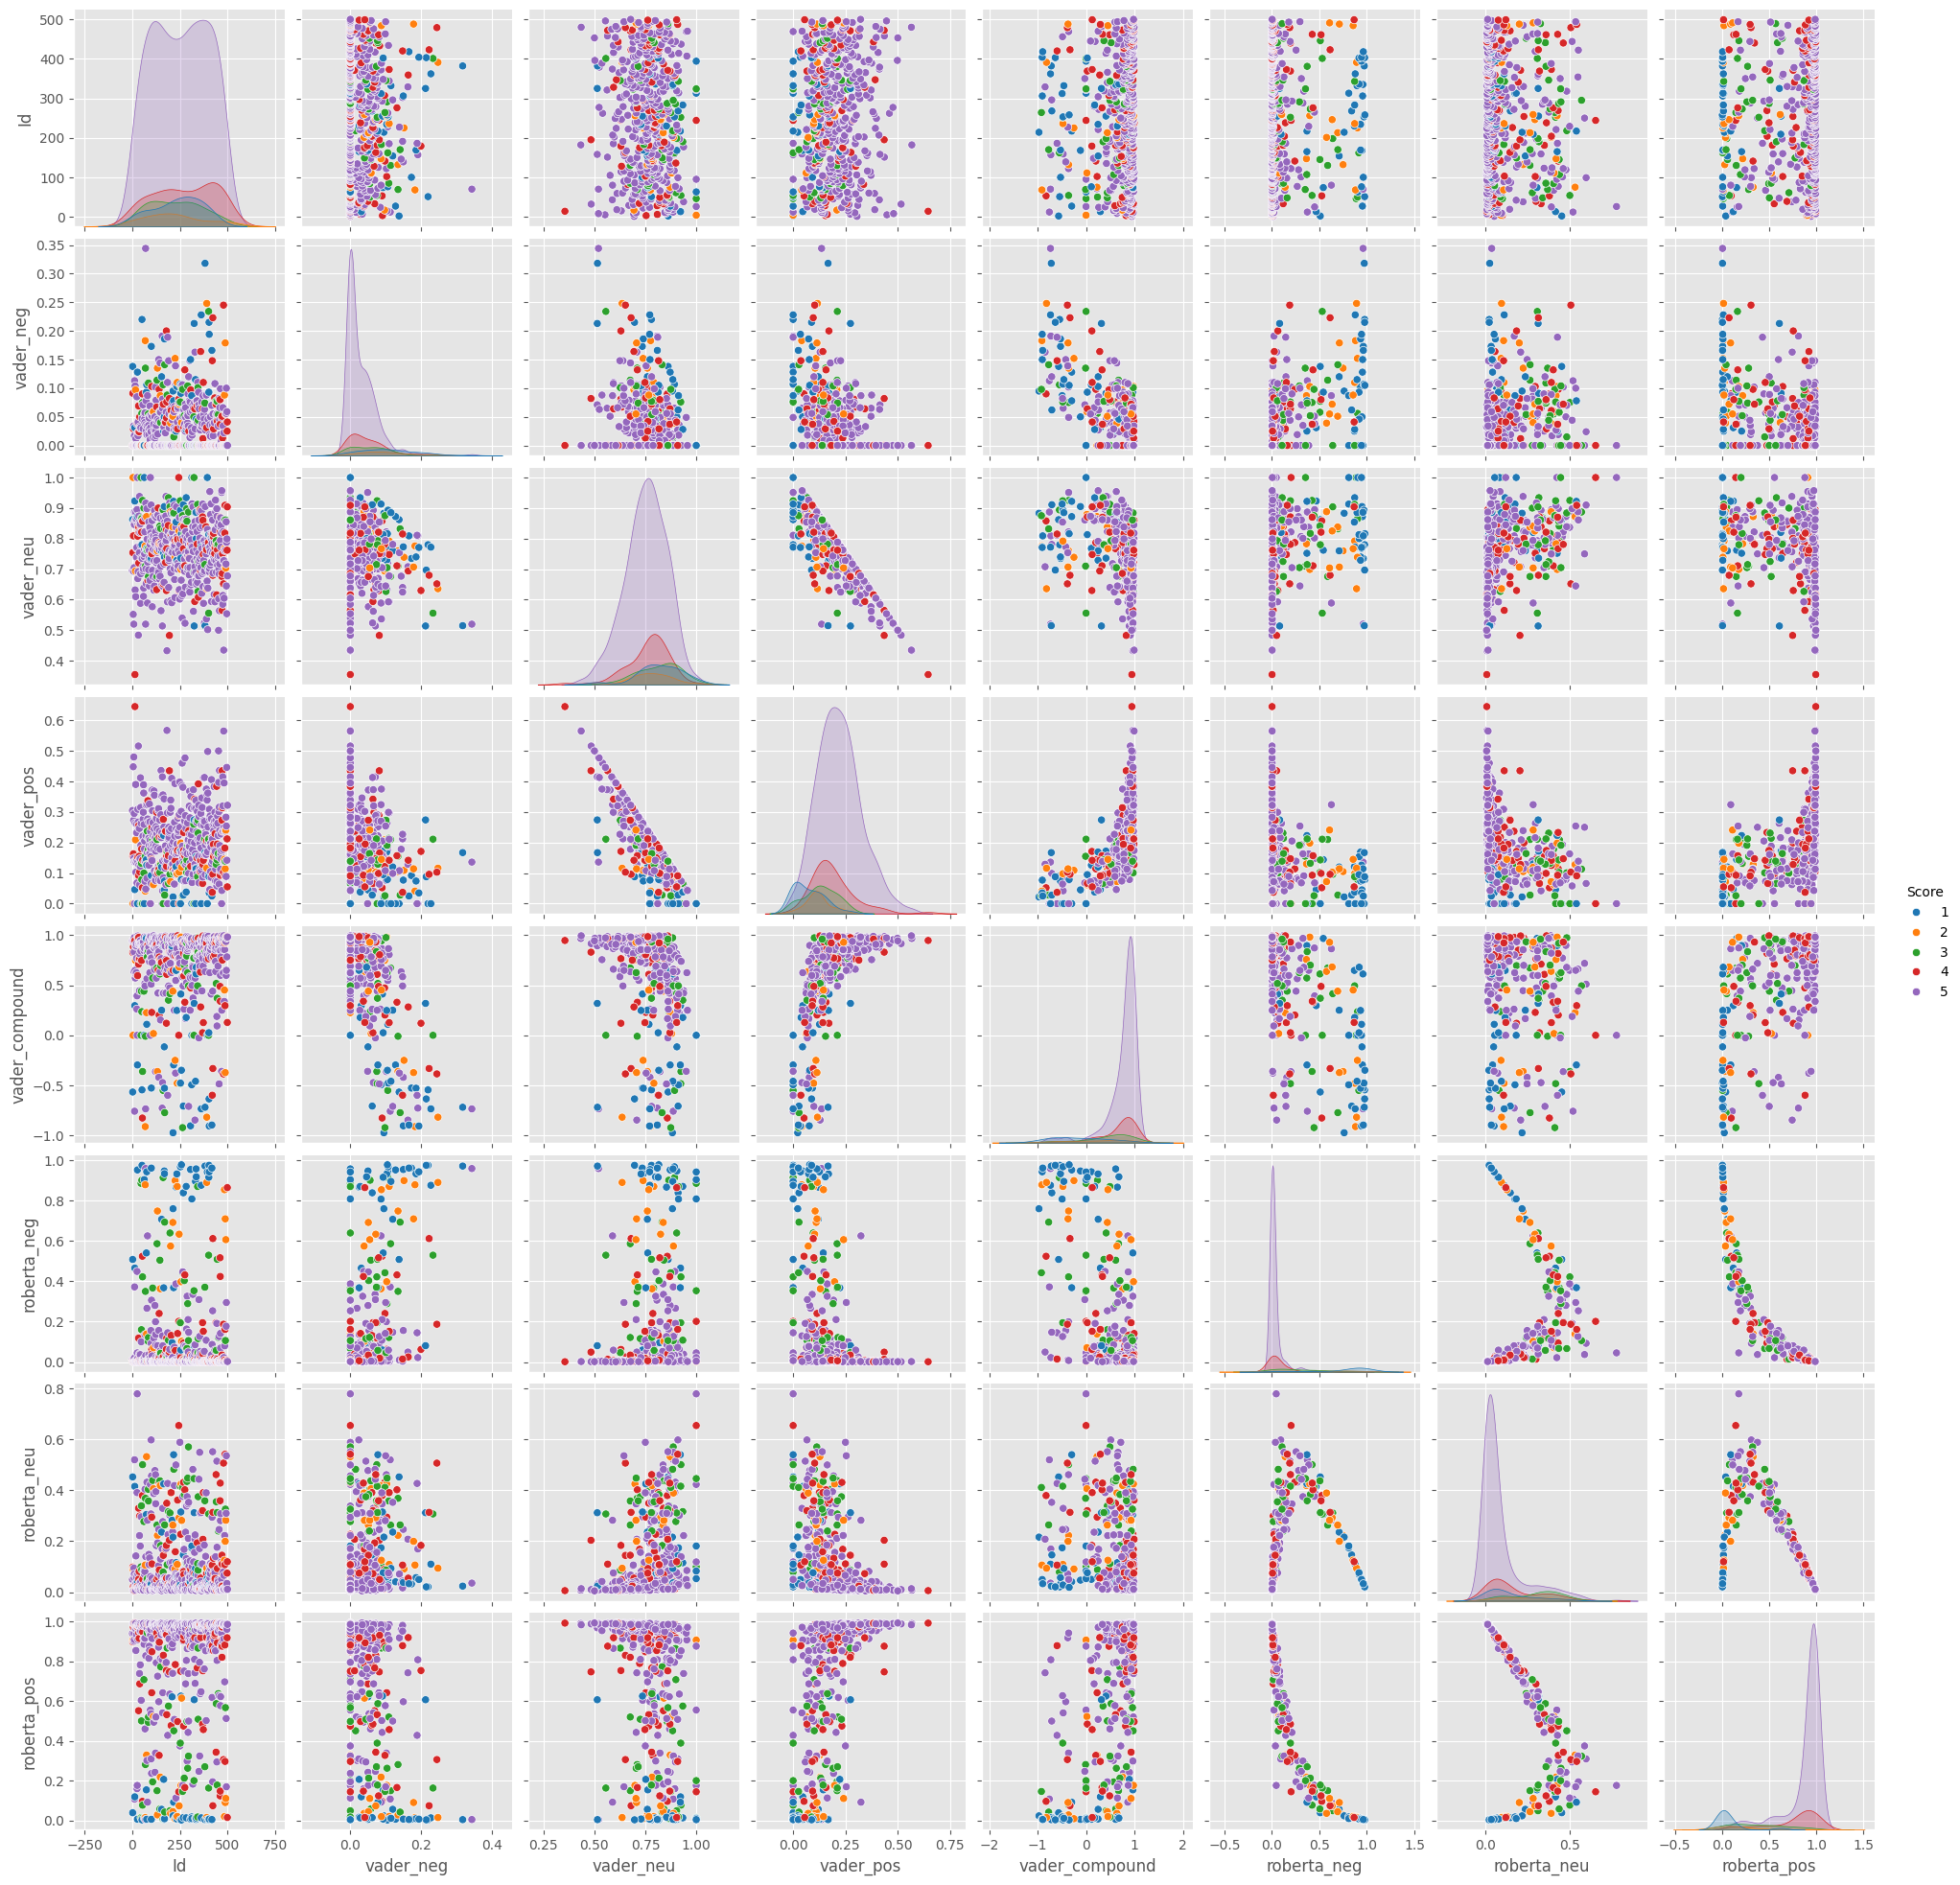

In [49]:
sns.pairplot(data = results_df,
             vars = ['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue = 'Score',
             palette = 'tab10')
plt.show()


## Step 4: Review Examples:
- Positive 1-star and Negative 5-star reviews
Let's look at some examples where the model scoring and review differ the most

In [52]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending = False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [55]:
results_df.query('Score == 1')\
.sort_values('vader_pos', ascending = False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [56]:
results_df.query('Score == 5')\
.sort_values('vader_neg', ascending = False)['Text'].values[0]
# This was example of negative statement with five stars and it is from vader_neg which only looks at the bag of words

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [57]:
results_df.query('Score == 5')\
.sort_values('roberta_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

The Transformer Pipeline
- Quick and easy way to run the sentiment predictions

In [58]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [59]:
sent_pipeline("I love travelling inside Afghanistan!")

[{'label': 'POSITIVE', 'score': 0.999480664730072}]

In [60]:
sent_pipeline("Make sure to like and subscribe!")

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [62]:
sent_pipeline("boooo")

[{'label': 'NEGATIVE', 'score': 0.7565686702728271}]